In [1]:
# Importing libraries 
import os
import sys
import glob
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits
from astropy.table import Table
from astropy.table import vstack
from astropy.io import fits
import pandas as pd
import urllib.request
import requests
import time

#Getting the individual coadded files names
local_dir = "/home/colgoat/Jupyter/" #path to the catalogs

# eBOSS

In [87]:
fileDR14 = "BALsamDR14.fits"
fileDR16 = "BALsamDR16.fits"


local_fileDR14 = os.path.join(local_dir,fileDR14)
local_fileDR16 = os.path.join(local_dir,fileDR16)

dr14 = Table.read(local_fileDR14)
dr16 = Table.read(local_fileDR16)
#<=
a = (dr14['BI_CIV']<=0)
b = (dr14['BI_CIV']>0)

I14 = len(dr14[a])
Ib14 = len(dr14[b])
pidat14 = np.array([I14,Ib14])
nBAL14 = [(I14/len(dr14))*100,(Ib14/len(dr14))*100]
#<=
c = (dr16['BI_CIV']<=0)
d = (dr16['BI_CIV']>0)

I16 = len(dr16[c])
Ib16 = len(dr16[d])
pidat16 = np.array([I16,Ib16])
nBAL16 = [(I16/len(dr16))*100,(Ib16/len(dr16))*100]

fDLA_DR14 = "DLA_DR14CorRa.fits"
fDLA_DR16 = "DLA_DR16.fits"
l_fdlaDR14 = os.path.join(local_dir,fDLA_DR14)
l_fdlaDR16 = os.path.join(local_dir,fDLA_DR16)
DLA14 = Table.read(l_fdlaDR14)
DLA16 = Table.read(l_fdlaDR16)


MCID_14 = np.array(dr14['THING_ID']) 
MCID_16 = np.array(dr16['THING_ID'])

dlaID_14 = np.array(DLA14['THING_ID'])
dlaID_16 = np.array(DLA16['THING_ID'])

A = np.intersect1d(MCID_14,dlaID_14)
mask14 = np.isin(MCID_14,A)
mask14 = np.invert(mask14)
tp14 = MCID_14[mask14]

B = np.intersect1d(MCID_16,dlaID_16)
mask16 = np.isin(MCID_16,B)
mask16 = np.invert(mask16)
tp16 = MCID_16[mask16]

mask16



array([ True,  True, False, ...,  True, False, False])

/tmp/ipykernel_53296/1142441512.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax['z'].set_xticklabels(z_ticks,fontsize = 15)
/tmp/ipykernel_53296/1142441512.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax['z'].set_yticklabels(N_ticks,fontsize = 15)


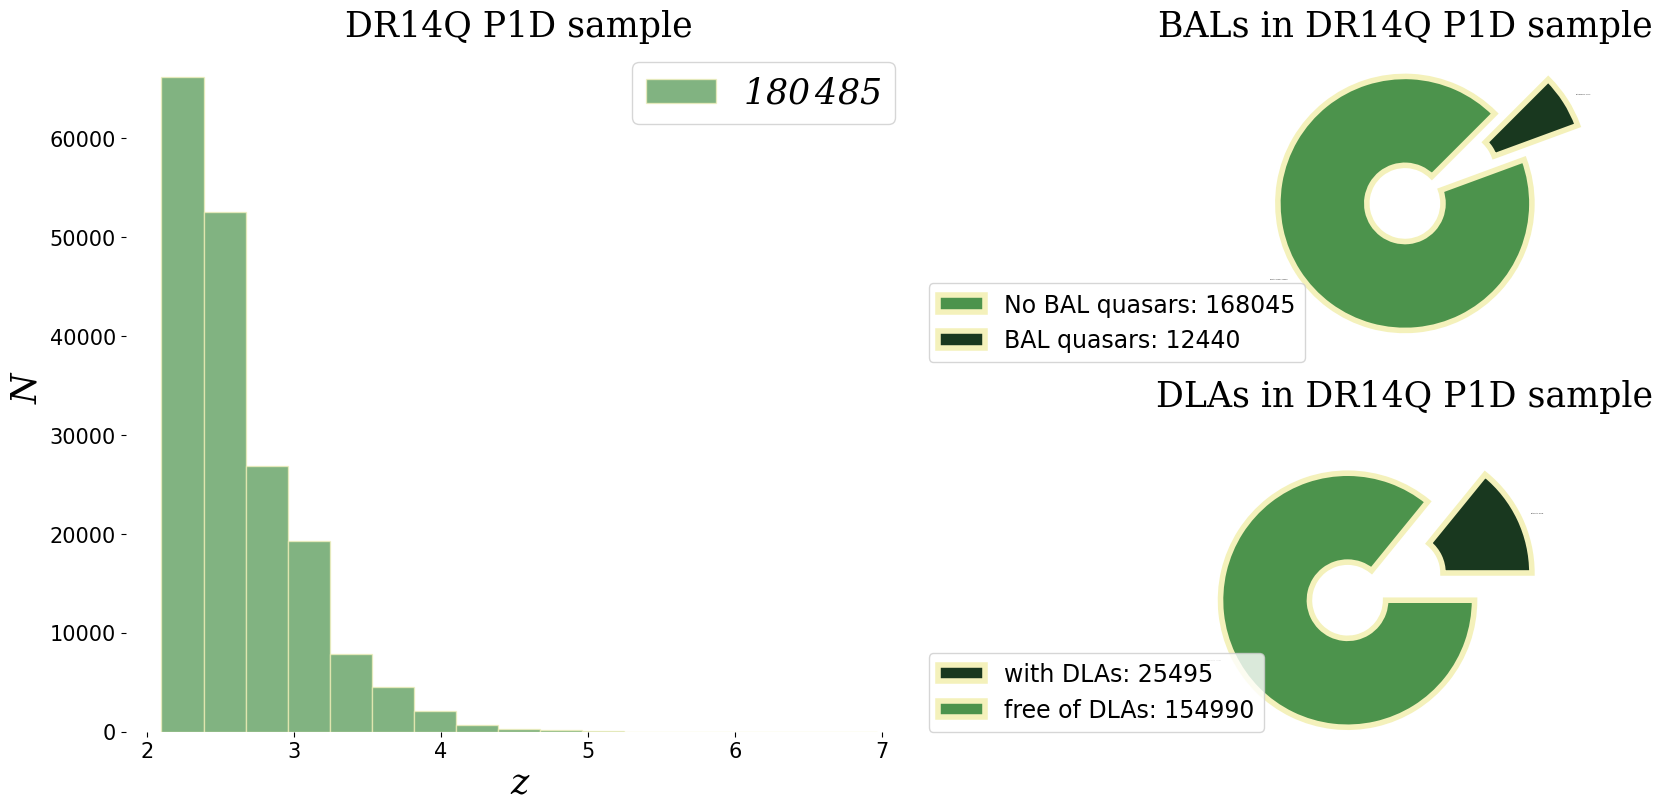

In [82]:
colrs14 = ["#4C934C", "#19381F"]
colrs16 = ["#6F8695", "#19381F"]
edgecol = '#F4F1BB'

expl = [0, 0.5]
z_ticks = [0,2,3,4,5,6,7]
N_ticks = [0,10000,20000,30000,40000,50000,60000]
txt_prop = {'style' : 'oblique', 'family' : 'serif', 'size' :25}

titles = ['DR14Q P1D sample','DR16Q P1D sample']

fig, ax = plt.subplot_mosaic([['z', 'BAL'], ['z', 'DLA']],layout='constrained',
                              figsize=(16,8), width_ratios = [1,0.5], height_ratios = [1,1], dpi = 100)


ax['z'].hist(dr14['Z'],alpha = 0.7, color =colrs14[0], label = str(len(dr14))[0:3]+'$\,$'+str(len(dr14))[3:6]
             ,bins = 17, edgecolor=edgecol)
ax['z'].set_xlabel("z",style = 'oblique', family = 'serif', size = 25)
ax['z'].set_ylabel("N",style = 'oblique', family = 'serif', size = 25)
ax['z'].set_title(titles[0]+"", weight='normal', style= 'normal', family = 'serif', size =25)
ax['z'].legend(loc="upper right", prop = txt_prop)
ax['z'].set_xticklabels(z_ticks,fontsize = 15)
ax['z'].set_yticklabels(N_ticks,fontsize = 15)
ax['z'].spines['top'].set_visible(False)
ax['z'].spines['right'].set_visible(False)
ax['z'].spines['left'].set_visible(False)
ax['z'].spines['bottom'].set_visible(False)

lbls = ["No BAL quasars: "+str(I14), "BAL quasars: "+str(Ib14)]
ax['BAL'].pie(pidat14,  startangle=45, 
        labels = lbls, explode = expl, colors =colrs14, textprops = {'fontsize': 0}, 
        wedgeprops={"edgecolor":edgecol,'linewidth': 4, 'linestyle': '-', 'antialiased': True, 'width' : 0.7})
ax['BAL'].set_title("BALs in "+titles[0][0:9]+" sample",weight='normal', style= 'normal', family = 'serif', size =25)
ax['BAL'].legend(fontsize = 17, loc =[-1,0])



lbls = ["with DLAs: "+str(len(A)), "free of DLAs: "+str(len(tp14))]
ax['DLA'].pie([len(A), len(tp14)], startangle=0, 
        labels = lbls, explode = expl, colors =np.flip(colrs14), textprops = {'fontsize': 0}, 
        wedgeprops={"edgecolor":edgecol,'linewidth': 4, 'linestyle': '-', 'antialiased': True, 'width' : 0.7})
ax['DLA'].set_title("DLAs in "+titles[0][0:9]+" sample",weight='normal', style= 'normal', family = 'serif', size =25)
ax['DLA'].legend(fontsize = 17, loc =[-1,0])

/tmp/ipykernel_53296/2978999236.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax['z'].set_xticklabels(z_ticks,fontsize = 15)
/tmp/ipykernel_53296/2978999236.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax['z'].set_yticklabels(N_ticks,fontsize = 15)


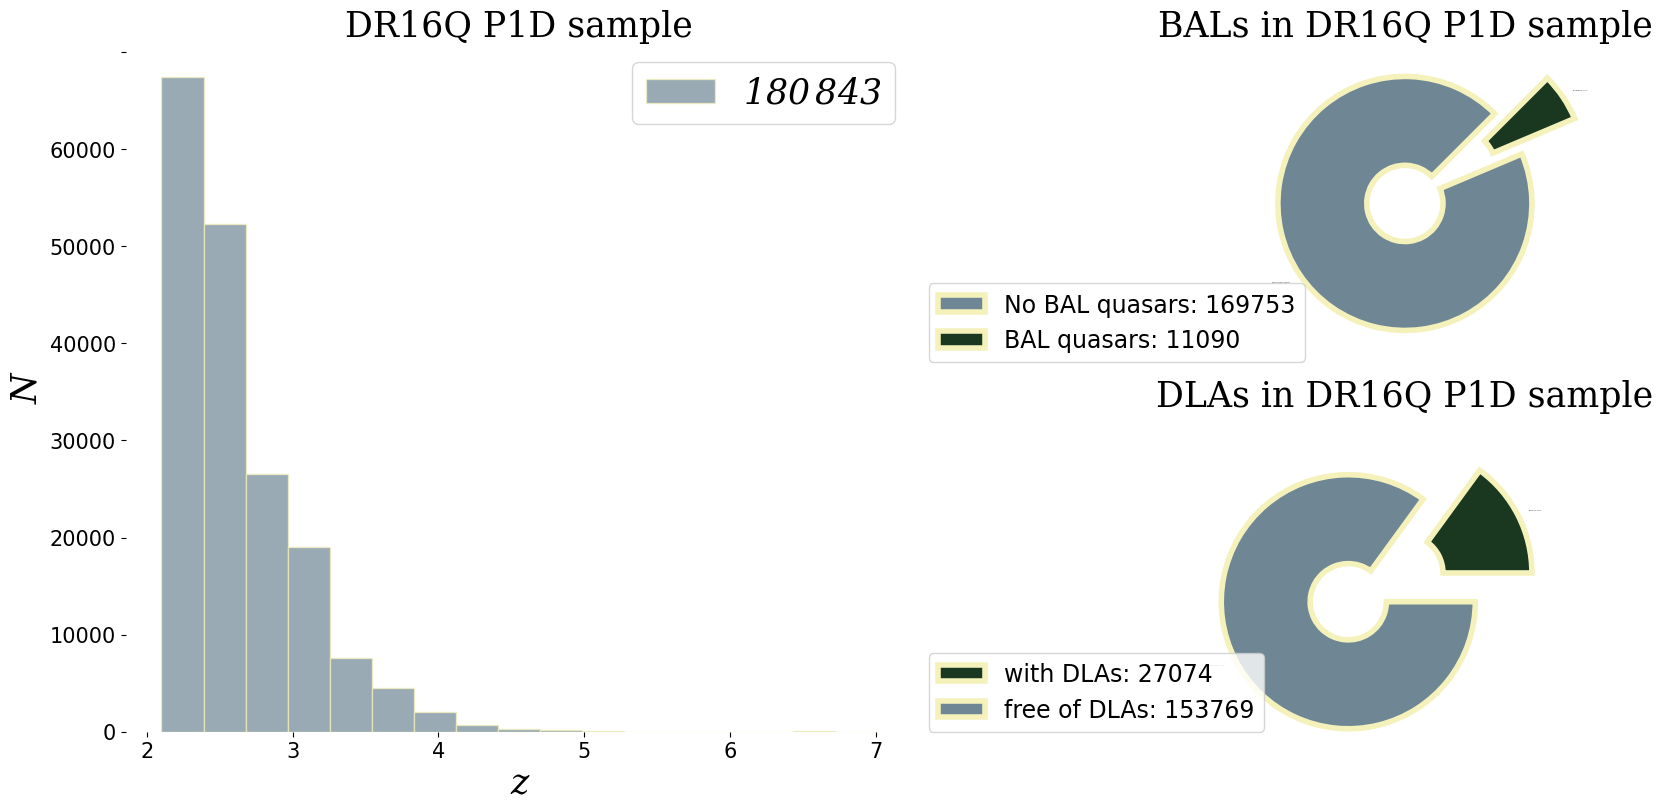

In [27]:
fig, ax = plt.subplot_mosaic([['z', 'BAL'], ['z', 'DLA']],layout='constrained',
                              figsize=(16,8), width_ratios = [1,0.5], height_ratios = [1,1], dpi = 100)


ax['z'].hist(dr16['Z'],alpha = 0.7, color =colrs16[0], label = str(len(dr16))[0:3]+'$\,$'+str(len(dr16))[3:6]
             ,bins = 17, edgecolor=edgecol)
ax['z'].set_xlabel("z",style = 'oblique', family = 'serif', size = 25)
ax['z'].set_ylabel("N",style = 'oblique', family = 'serif', size = 25)
ax['z'].set_title(titles[1]+"", weight='normal', style= 'normal', family = 'serif', size =25)
ax['z'].legend(loc="upper right", prop = txt_prop)
ax['z'].set_xticklabels(z_ticks,fontsize = 15)
ax['z'].set_yticklabels(N_ticks,fontsize = 15)
ax['z'].spines['top'].set_visible(False)
ax['z'].spines['right'].set_visible(False)
ax['z'].spines['left'].set_visible(False)
ax['z'].spines['bottom'].set_visible(False)

lbls = ["No BAL quasars: "+str(I16), "BAL quasars: "+str(Ib16)]
ax['BAL'].pie(pidat16,  startangle=45, 
        labels = lbls, explode = expl, colors =colrs16, textprops = {'fontsize': 0}, 
        wedgeprops={"edgecolor":edgecol,'linewidth': 4, 'linestyle': '-', 'antialiased': True, 'width' : 0.7})
ax['BAL'].set_title("BALs in "+titles[1][0:9]+" sample",weight='normal', style= 'normal', family = 'serif', size =25)
ax['BAL'].legend(fontsize = 17, loc =[-1,0])


lbls = ["with DLAs: "+str(len(B)), "free of DLAs: "+str(len(tp16))]
ax['DLA'].pie([len(B), len(tp16)], startangle=0, 
        labels = lbls, explode = expl, colors =np.flip(colrs16), textprops = {'fontsize': 0}, 
        wedgeprops={"edgecolor":edgecol,'linewidth': 4, 'linestyle': '-', 'antialiased': True, 'width' : 0.7})
ax['DLA'].set_title("DLAs in "+titles[1][0:9]+" sample",weight='normal', style= 'normal', family = 'serif', size =25)
ax['DLA'].legend(fontsize = 17, loc =[-1,0])

# DESI

/tmp/ipykernel_53296/3570076896.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax['z'].set_xticklabels(z_ticks,fontsize = 15)
/tmp/ipykernel_53296/3570076896.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax['z'].set_yticklabels(N_ticks,fontsize = 15)


Text(0, 0.5, 'No public DLA catalog yet')

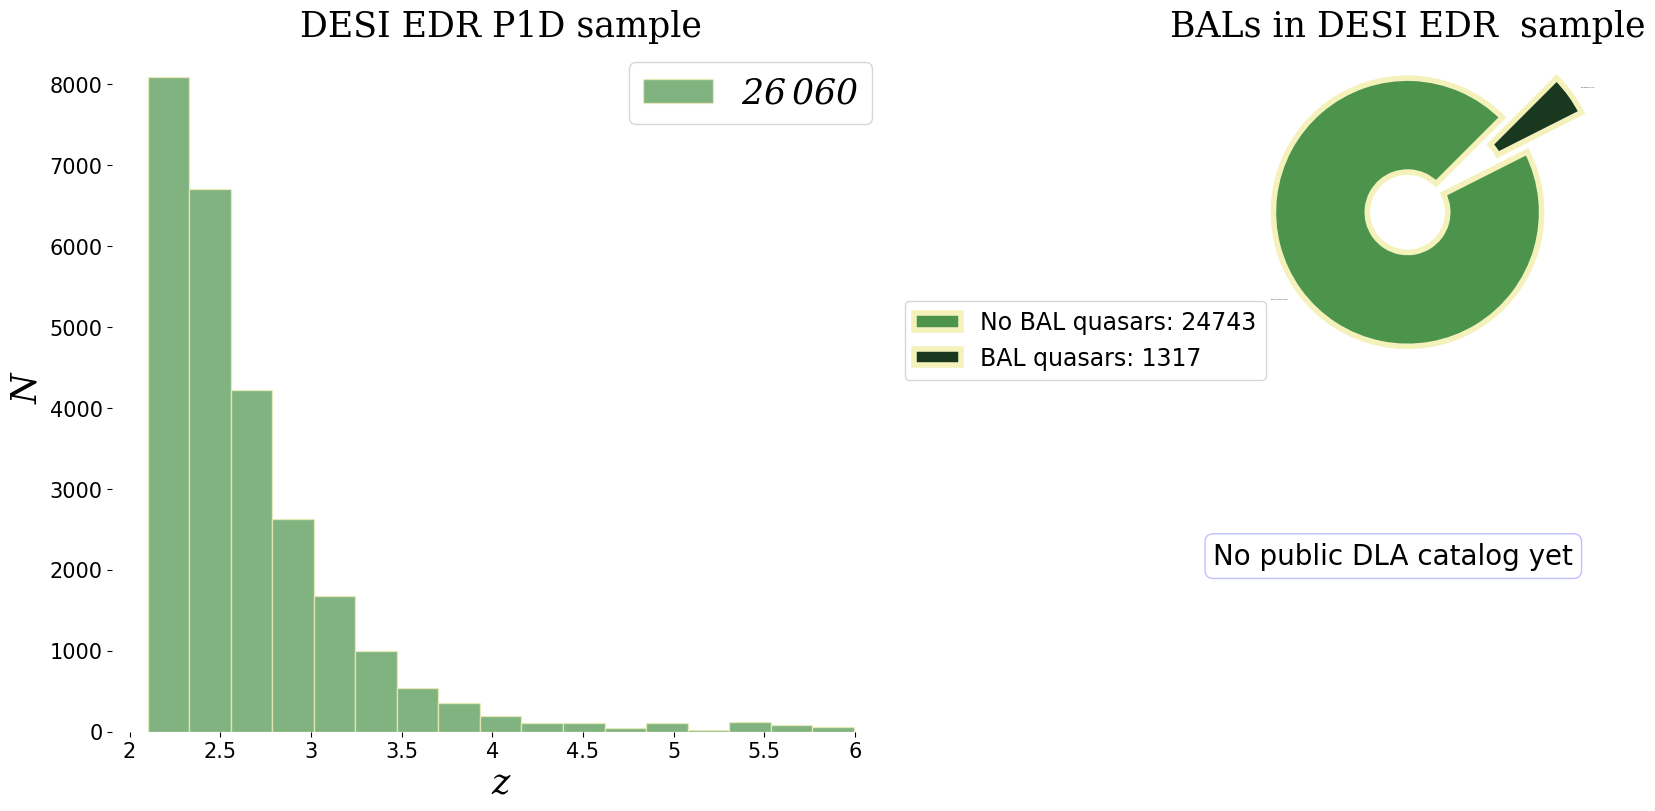

In [4]:
fileDESI = "DESIedr_FINALcat.fits"
local_fileDESI = os.path.join(local_dir,fileDESI)
desi = Table.read(local_fileDESI)

a = (desi['BI_CIV']<=0)
b = (desi['BI_CIV']>0)

I = len(desi[a])
Ib = len(desi[b])
pidat = np.array([I,Ib])
nBAL = [(I/len(desi))*100,(Ib/len(desi))*100]

colrsDESI = ["#4C934C", "#19381F"]
edgecol = '#F4F1BB'

expl = [0, 0.5]
z_ticks = [0,2,2.5,3,3.5,4,4.5,5,5.5,6]
N_ticks = [0,1000,2000,3000,4000,5000,6000,7000,8000]
txt_prop = {'style' : 'oblique', 'family' : 'serif', 'size' :25}

titles = ['DESI EDR P1D sample','none']


fig, ax = plt.subplot_mosaic([['z', 'BAL'], ['z', 'DLA']],layout='constrained',
                              figsize=(16,8), width_ratios = [1,0.5], height_ratios = [1,1], dpi = 100)


ax['z'].hist(desi['Z'],alpha = 0.7, color =colrsDESI[0], label = str(len(desi))[0:2]+'$\,$'+str(len(desi))[2:5]
             ,bins = 17, edgecolor=edgecol)
ax['z'].set_xlabel("z",style = 'oblique', family = 'serif', size = 25)
ax['z'].set_ylabel("N",style = 'oblique', family = 'serif', size = 25)
ax['z'].set_title(titles[0]+"", weight='normal', style= 'normal', family = 'serif', size =25)
ax['z'].legend(loc="upper right", prop = txt_prop)
ax['z'].set_xticklabels(z_ticks,fontsize = 15)
ax['z'].set_yticklabels(N_ticks,fontsize = 15)
ax['z'].spines['top'].set_visible(False)
ax['z'].spines['right'].set_visible(False)
ax['z'].spines['left'].set_visible(False)
ax['z'].spines['bottom'].set_visible(False)

lbls = ["No BAL quasars: "+str(I), "BAL quasars: "+str(Ib)]
ax['BAL'].pie(pidat,  startangle=45, 
        labels = lbls, explode = expl, colors =colrsDESI, textprops = {'fontsize': 0}, 
        wedgeprops={"edgecolor":edgecol,'linewidth': 4, 'linestyle': '-', 'antialiased': True, 'width' : 0.7})
ax['BAL'].set_title("BALs in "+titles[0][0:9]+" sample",weight='normal', style= 'normal', family = 'serif', size =25)
ax['BAL'].legend(fontsize = 17, loc =[-1,0])

ax['DLA'].axis('off')
ax['DLA'].text(0, 0.5, ('No public DLA catalog yet'), \
bbox = {'facecolor': 'white', 'alpha': 0.25, 'boxstyle': "round,pad=0.3", 'ec': 'blue'}, size = 20)

# F(z)

In [68]:
def extr14b(i,f):
    A = dr14[(dr14['Z']>i) & (dr14['Z']<=f) & (dr14['BI_CIV']>0)]
    return (len(A))
def extr16b(i,f):
    A = dr16[(dr16['Z']>i) & (dr16['Z']<=f) & (dr16['BI_CIV']>0)]
    return (len(A))
def extr14Q(i,f):
    A = dr14[(dr14['Z']>i) & (dr14['Z']<=f) & (dr14['BI_CIV']<=0)]
    return (len(A))
def extr16Q(i,f):
    A = dr16[(dr16['Z']>i) & (dr16['Z']<=f) & (dr16['BI_CIV']<=0)]
    return (len(A))
def extrDb(i,f):
    A = desi[(desi['Z']>i) & (desi['Z']<=f) & (desi['BI_CIV']>0)]
    return (len(A))
def extrDQ(i,f):
    A = desi[(desi['Z']>i) & (desi['Z']<=f) & (desi['BI_CIV']<=0)]
    return (len(A))

#4.7
ar = [2.0,2.3,2.5,2.7,2.9,3.1,3.3,3.5,3.7,3.9,4.1,4.3,4.5,4.7]
z_bin = [2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6]

In [70]:
Nb14 = []
NQ14 = []

for d in range(13):
    Nb14.append(extr14b(ar[d],ar[d+1]))
    NQ14.append(extr14Q(ar[d],ar[d+1]))

Nb14 = np.array(Nb14)
NQ14 = np.array(NQ14)

F1 = Nb14/NQ14

Nb16 = []
NQ16 = []

for d in range(13):
    Nb16.append(extr16b(ar[d],ar[d+1]))
    NQ16.append(extr16Q(ar[d],ar[d+1]))

Nb16 = np.array(Nb16)
NQ16 = np.array(NQ16)

F2 = Nb16/NQ16

NbD = []
NQD = []

for d in range(13):
    NbD.append(extrDb(ar[d],ar[d+1]))
    NQD.append(extrDQ(ar[d],ar[d+1]))

NbD = np.array(NbD)
NQD = np.array(NQD)

F3 = NbD/NQD

In [71]:
cont = 0

for i in range(len(NQ14)):
    u = NQ14[i]
    cont = u + cont
    
print(cont)


167823


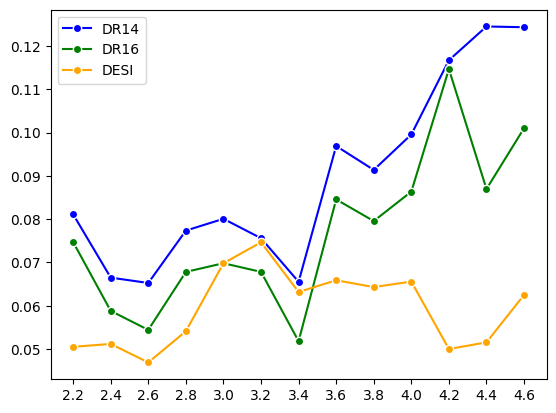

In [72]:
plt.plot(z_bin,F1,label = 'DR14',marker = 'o',color = 'blue',mec = 'w')
plt.plot(z_bin,F2,label = 'DR16',marker = 'o',color = 'green',mec = 'w')
plt.plot(z_bin,F3,label = 'DESI',marker = 'o',color = 'orange',mec = 'w')
plt.xticks(z_bin)
plt.legend()

In [21]:
def extr14DLA(i,f):
    A = DLA14[(DLA14['Z']>i) & (DLA14['Z']<=f)]
    return (len(A))
def extr16DLA(i,f):
    A = DLA16[(DLA16['Z']>i) & (DLA16['Z']<=f)]
    return (len(A))

In [30]:
NDLA14 = []
NQ14 = []

for d in range(13):
    NDLA14.append(extr14DLA(ar[d],ar[d+1]))
    NQ14.append(extr14Q(ar[d],ar[d+1]))

NDLA14 = np.array(NDLA14)
NQ14 = np.array(NQ14)

F4 = NDLA14/NQ14



NDLA16 = []
NQ16 = []

for d in range(13):
    NDLA16.append(extr16DLA(ar[d],ar[d+1]))
    NQ16.append(extr16Q(ar[d],ar[d+1]))

NDLA16 = np.array(NDLA16)
NQ16 = np.array(NQ16)

F5 = NDLA16/NQ16

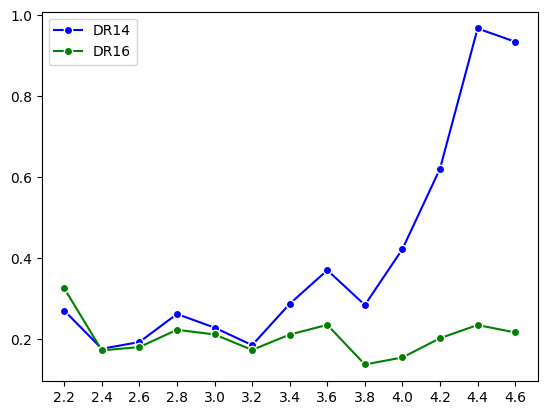

In [23]:
plt.plot(z_bin,F4,label = 'DR14',marker = 'o',color = 'blue',mec = 'w')
plt.plot(z_bin,F5,label = 'DR16',marker = 'o',color = 'green',mec = 'w')
plt.xticks(z_bin)
plt.legend()

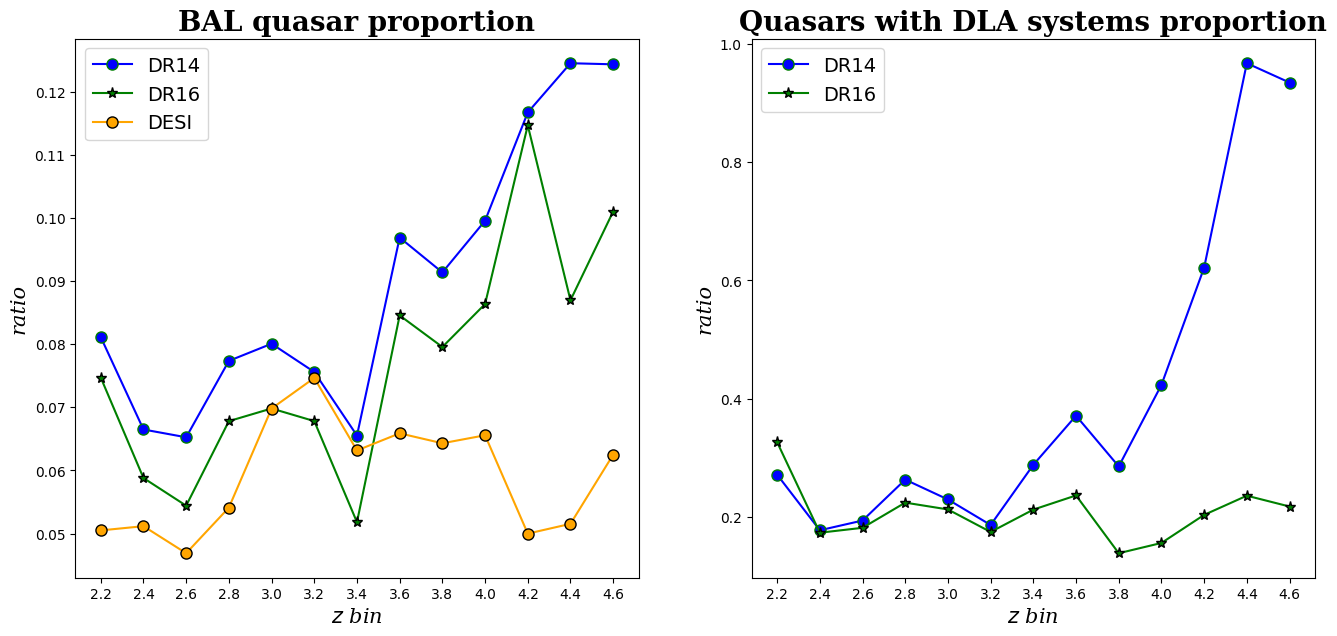

In [41]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,7))

ax1.plot(z_bin,F1,label = 'DR14',marker = 'o',color = 'blue',mec = 'g',ms= 8)
ax1.plot(z_bin,F2,label = 'DR16',marker = '*',color = 'green',mec = 'k',ms= 8)
ax1.plot(z_bin,F3,label = 'DESI',marker = 'o',color = 'orange',mec = 'k',ms= 8)
ax1.set_title(r'BAL quasar proportion',weight='semibold', 
            style= 'normal', family = 'serif', size =20)
ax1.set_ylabel('ratio',style = 'oblique',
           family = 'serif', size = 15)
ax1.set_xlabel(r'$z$ bin',style = 'oblique',
           family = 'serif', size = 15)
ax1.set_xticks(z_bin)
ax1.legend(fontsize = 14)


ax2.plot(z_bin,F4,label = 'DR14',marker = 'o',color = 'blue',mec = 'g',ms= 8)
ax2.plot(z_bin,F5,label = 'DR16',marker = '*',color = 'green',mec = 'k',ms= 8)
ax2.set_title(r'Quasars with DLA systems proportion',weight='semibold', 
            style= 'normal', family = 'serif', size =20)
ax2.set_ylabel('ratio',style = 'oblique',
           family = 'serif', size = 15)
ax2.set_xlabel(r'$z$ bin',style = 'oblique',
           family = 'serif', size = 15)
ax2.set_xticks(z_bin)
ax2.legend(fontsize = 14)


# DLAs catalogs comparison

In [12]:
fDLA_DR14 = "DLA_DR14CorRa.fits"
fDLA_DR16 = "DLA_DR16.fits"
l_fdlaDR14 = os.path.join(local_dir,fDLA_DR14)
l_fdlaDR16 = os.path.join(local_dir,fDLA_DR16)
DLA14 = Table.read(l_fdlaDR14)
DLA16 = Table.read(l_fdlaDR16)


DLAID_14 = np.array(DLA14['THING_ID']) 
DLAID_16 = np.array(DLA16['THING_ID'])

u = np.intersect1d(DLAID_14,DLAID_16)
mask_dla_14 = np.isin(DLAID_14,u)
mask_dla_14 = np.invert(mask_dla_14)
DLAmatch = DLAID_14[mask_dla_14]


print(len(DLAmatch))
print(len(DLA14))
print(len(DLA16))

16262
39023
39514


# BAL and DLA on the Sky

In [99]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt

def hour(d):
    h = d*(24/360)
    return h

def rad(d):
    r = d*((2*np.pi)/360)
    return r

BALs on the Sky

In [100]:
Sd14BAL = dr14[dr14['BI_CIV']>0]
Sd16BAL = dr16[dr16['BI_CIV']>0]

In [101]:
titles = ['DR14Q subcatalog','DR16Q subcatalog']

RA14 = np.array(Sd14BAL['RA'])
DEC14 = np.array(Sd14BAL['DEC'])
eq14 = SkyCoord(RA14, DEC14, unit=u.deg)

ra_rad14 = eq14.ra.wrap_at(180 * u.deg).radian
dec_rad14 = eq14.dec.radian
z14 = np.array(Sd14BAL['Z'])
z16 = np.array(Sd16BAL['Z'])

RA16 = np.array(Sd16BAL['RA'])
DEC16 = np.array(Sd16BAL['DEC'])
eq16 = SkyCoord(RA16, DEC16, unit=u.deg)

ra_rad16 = eq16.ra.wrap_at(180 * u.deg).radian
dec_rad16 = eq16.dec.radian

/tmp/ipykernel_53296/3316580745.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(121, projection='aitoff')
/tmp/ipykernel_53296/3316580745.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(122, projection='polar')


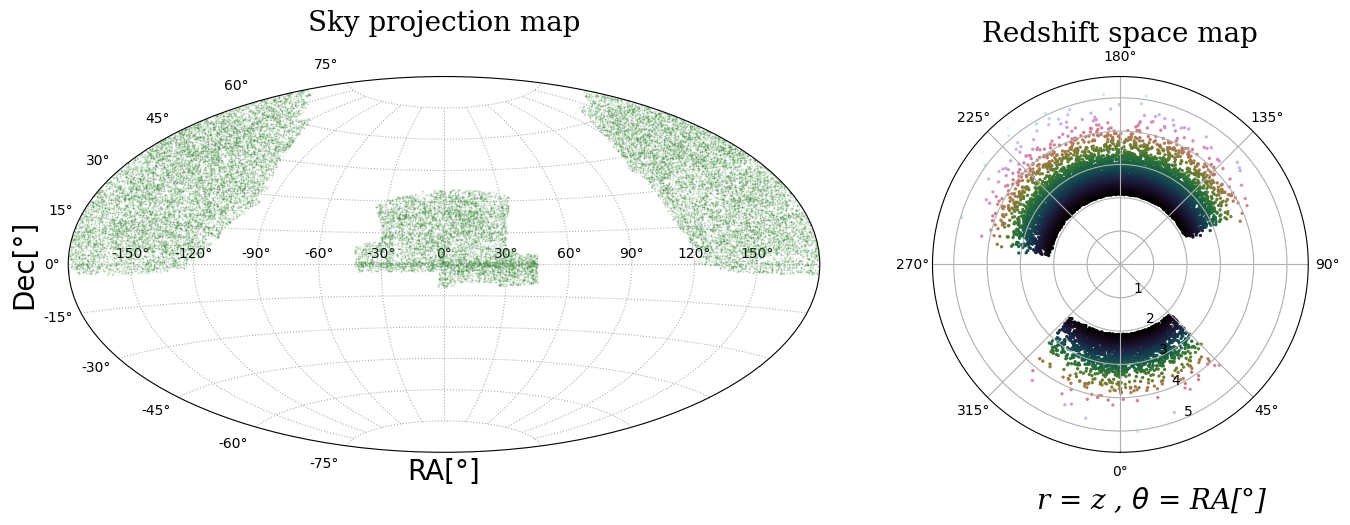

In [116]:
fig, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]},figsize=(16,10),dpi=100)

ax0 = plt.subplot(121, projection='aitoff')
ax0.set_title('Sky projection map',x = 0.5,y = 1.1,
              weight='normal', style = 'normal', family = 'serif', size =20)
ax0.set_xlabel("RA[°]", size = 20)
ax0.set_ylabel("Dec[°]", size = 20)
ax0.plot(ra_rad14, dec_rad14, '*', markersize=0.7, alpha=0.2, color = colrs14[0])
ax0.grid(True,linestyle=':')

ax1 = plt.subplot(122, projection='polar')
colorsDR14 = Sd14BAL['Z']
ax1.scatter(rad(Sd14BAL['RA']), Sd14BAL['Z'], c=colorsDR14, alpha=0.95,cmap='cubehelix', s=2)
ax1.set_theta_zero_location('W', offset=90)
ax1.set_title("Redshift space map",weight='normal', style = 'normal', family = 'serif', size =20)
label_position1=ax1.get_rlabel_position()
ax1.text(np.radians(label_position1-15),ax1.get_rmax()+1.5,r'r = z , ${\theta}$ = RA[°]',
        rotation=0,ha='center',va='center', style = 'oblique', family = 'serif', size = 20)

#fig.suptitle('eBOSS DR14Q quasar sample',x = 0.5,y = 0.8,weight='normal',
             #style = 'oblique',family = 'serif',fontsize = 30)

plt.show()

/tmp/ipykernel_53296/3178729345.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(121, projection='aitoff')
/tmp/ipykernel_53296/3178729345.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(122, projection='polar')


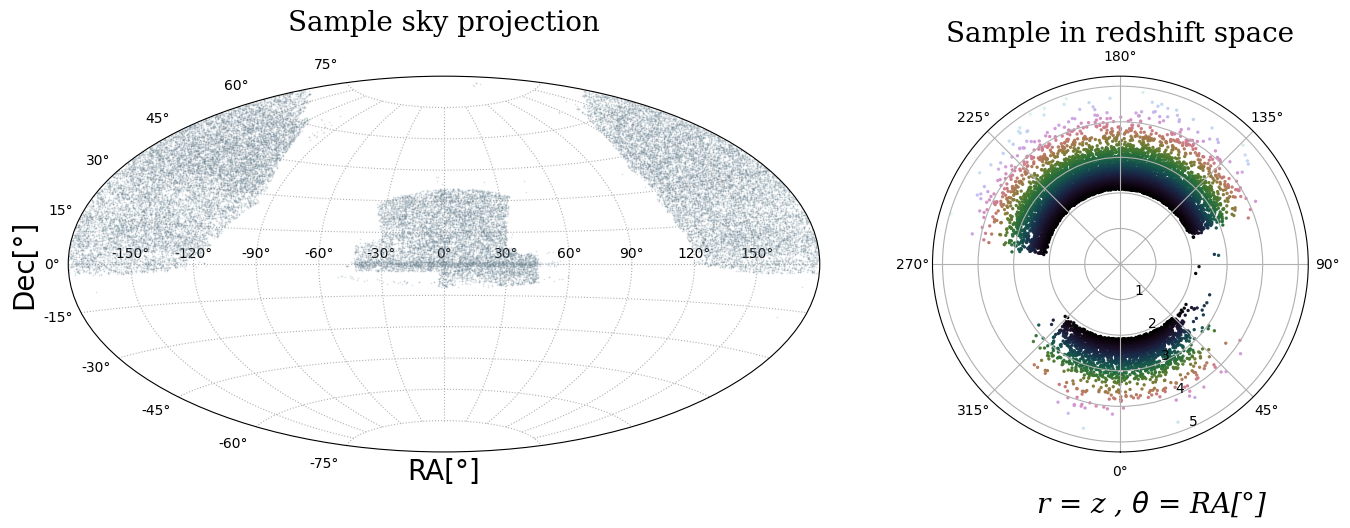

In [117]:
fig, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]},figsize=(16,10),dpi=100)

ax0 = plt.subplot(121, projection='aitoff')
ax0.set_title('Sample sky projection',x = 0.5,y = 1.1,
              weight='normal', style = 'normal', family = 'serif', size =20)
ax0.set_xlabel("RA[°]", size = 20)
ax0.set_ylabel("Dec[°]", size = 20)
ax0.plot(ra_rad16, dec_rad16, '*', markersize=0.7, alpha=0.2, color = colrs16[0])
ax0.grid(True,linestyle=':')

ax1 = plt.subplot(122, projection='polar')
colorsDR16 = Sd16BAL['Z']
ax1.scatter(rad(Sd16BAL['RA']), Sd16BAL['Z'], c=colorsDR16, alpha=0.95,cmap='cubehelix', s=2)
ax1.set_theta_zero_location('W', offset=90)
ax1.set_title("Sample in redshift space",weight='normal', style = 'normal', family = 'serif', size =20)
label_position1=ax1.get_rlabel_position()
ax1.text(np.radians(label_position1-15),ax1.get_rmax()+1.5,r'r = z , ${\theta}$ = RA[°]',
        rotation=0,ha='center',va='center', style = 'oblique', family = 'serif', size = 20)

#fig.suptitle('eBOSS DR16Q quasar sample',x = 0.5,y = 0.8,weight='normal',
             #style = 'oblique',family = 'serif',fontsize = 30)

plt.show()

DLAs on the Sky

In [110]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt

def hour(d):
    h = d*(24/360)
    return h

def rad(d):
    r = d*((2*np.pi)/360)
    return r

In [111]:
Sd14DLA = DLA14[(DLA14['THING_ID']!=0)]
Sd16DLA = DLA16[(DLA16['THING_ID']!=0)]

In [112]:
titles = ['DR14Q subcatalog','DR16Q subcatalog']

RA14 = np.array(Sd14DLA['RA'])
DEC14 = np.array(Sd14DLA['DEC'])
eq14 = SkyCoord(RA14, DEC14, unit=u.deg)

ra_rad14 = eq14.ra.wrap_at(180 * u.deg).radian
dec_rad14 = eq14.dec.radian
z14 = np.array(Sd14DLA['Z'])
z16 = np.array(Sd16DLA['Z'])

RA16 = np.array(Sd16DLA['RA'])
DEC16 = np.array(Sd16DLA['DEC'])
eq16 = SkyCoord(RA16, DEC16, unit=u.deg)

ra_rad16 = eq16.ra.wrap_at(180 * u.deg).radian
dec_rad16 = eq16.dec.radian

/tmp/ipykernel_53296/3943986174.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(121, projection='aitoff')
/tmp/ipykernel_53296/3943986174.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(122, projection='polar')


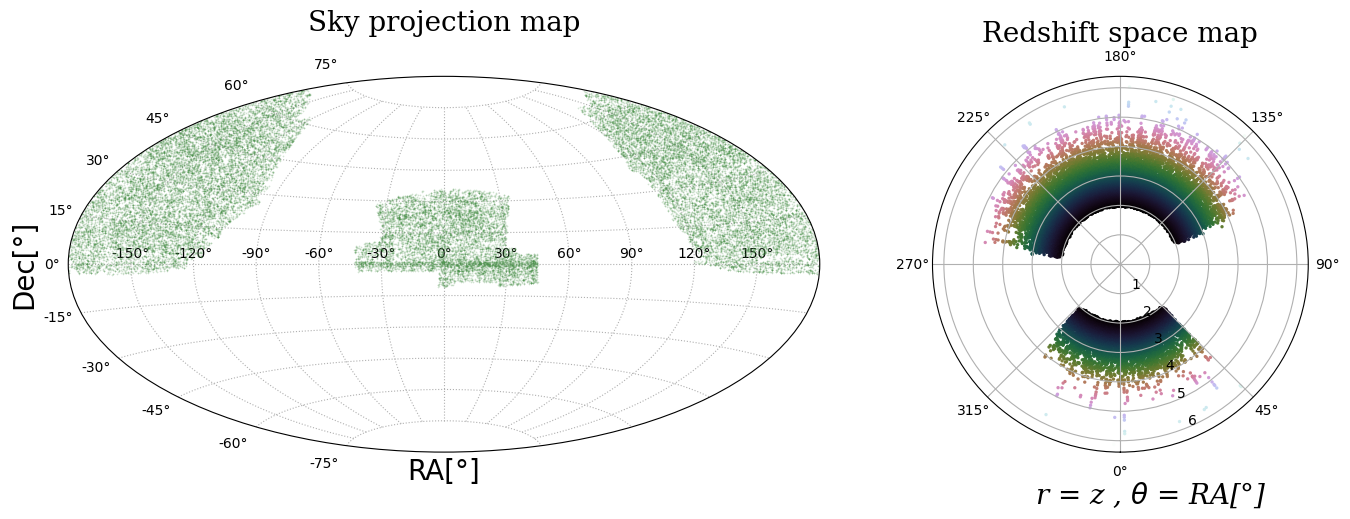

In [118]:
fig, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]},figsize=(16,10),dpi=100)

ax0 = plt.subplot(121, projection='aitoff')
ax0.set_title('Sky projection map',x = 0.5,y = 1.1,
              weight='normal', style = 'normal', family = 'serif', size =20)
ax0.set_xlabel("RA[°]", size = 20)
ax0.set_ylabel("Dec[°]", size = 20)
ax0.plot(ra_rad14, dec_rad14, '*', markersize=0.7, alpha=0.2, color = colrs14[0])
ax0.grid(True,linestyle=':')

ax1 = plt.subplot(122, projection='polar')
colorsDR14 = Sd14DLA['Z']
ax1.scatter(rad(Sd14DLA['RA']), Sd14DLA['Z'], c=colorsDR14, alpha=0.95,cmap='cubehelix', s=2)
ax1.set_theta_zero_location('W', offset=90)
ax1.set_title("Redshift space map",weight='normal', style = 'normal', family = 'serif', size =20)
label_position1=ax1.get_rlabel_position()
ax1.text(np.radians(label_position1-15),ax1.get_rmax()+1.5,r'r = z , ${\theta}$ = RA[°]',
        rotation=0,ha='center',va='center', style = 'oblique', family = 'serif', size = 20)

#fig.suptitle('eBOSS DR14Q quasar sample',x = 0.5,y = 0.8,weight='normal',
             #style = 'oblique',family = 'serif',fontsize = 30)

plt.show()

/tmp/ipykernel_53296/3082099334.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(121, projection='aitoff')
/tmp/ipykernel_53296/3082099334.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(122, projection='polar')


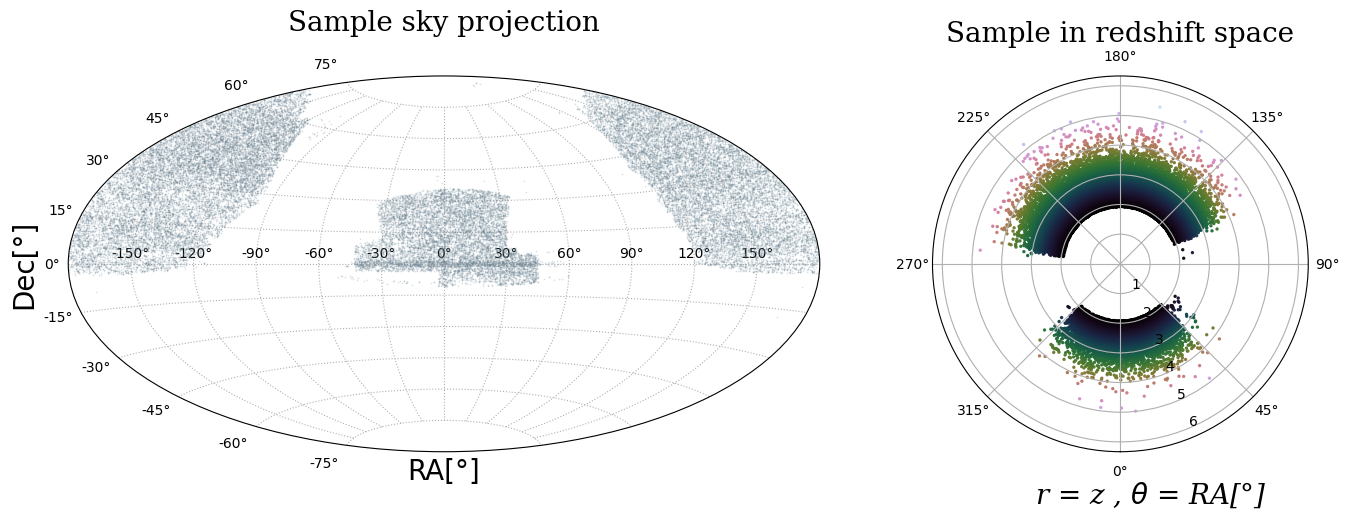

In [120]:
fig, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]},figsize=(16,10),dpi=100)

ax0 = plt.subplot(121, projection='aitoff')
ax0.set_title('Sample sky projection',x = 0.5,y = 1.1,
              weight='normal', style = 'normal', family = 'serif', size =20)
ax0.set_xlabel("RA[°]", size = 20)
ax0.set_ylabel("Dec[°]", size = 20)
ax0.plot(ra_rad16, dec_rad16, '*', markersize=0.7, alpha=0.2, color = colrs16[0])
ax0.grid(True,linestyle=':')

ax1 = plt.subplot(122, projection='polar')
colorsDR16 = Sd16DLA['Z']
ax1.scatter(rad(Sd16DLA['RA']), Sd16DLA['Z'], c=colorsDR16, alpha=0.95,cmap='cubehelix', s=2)
ax1.set_theta_zero_location('W', offset=90)
ax1.set_title("Sample in redshift space",weight='normal', style = 'normal', family = 'serif', size =20)
label_position1=ax1.get_rlabel_position()
ax1.text(np.radians(label_position1-15),ax1.get_rmax()+1.5,r'r = z , ${\theta}$ = RA[°]',
        rotation=0,ha='center',va='center', style = 'oblique', family = 'serif', size = 20)

#fig.suptitle('eBOSS DR16Q quasar sample',x = 0.5,y = 0.8,weight='normal',
             #style = 'oblique',family = 'serif',fontsize = 30)

plt.show()